In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print("Seaborn imported for statistical visualization")


Libraries imported successfully
NumPy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn imported for statistical visualization


# Exercise 3: Linear Regression - Theory and Implementation

## Overview

This exercise provides a comprehensive introduction to Linear Regression, covering both theoretical foundations and practical implementation. You will learn to build a complete linear regression model from scratch using matrix operations and gradient descent optimization.

**Learning Objectives:**
- Master the mathematical foundations of linear regression
- Understand essential matrix operations for machine learning
- Implement gradient descent optimization from scratch
- Build and evaluate a complete linear regression model
- Connect theory to practical implementation

**Prerequisites:**
- Linear Algebra fundamentals (vectors, matrices, matrix operations)
- Basic calculus (derivatives, partial derivatives)
- Python programming and NumPy

---

## Part 1: Essential Theory and Mathematical Foundations

### 1.1 Linear Regression Model

Linear regression models the relationship between input features and a target variable using a linear function.

**For a single sample:**
$$y = \mathbf{x}^T \boldsymbol{\theta} + \epsilon$$

**For multiple samples (matrix form):**
$$\mathbf{y} = \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\epsilon}$$

Where:
- $\mathbf{y} \in \mathbb{R}^m$: target vector (m samples)
- $\mathbf{X} \in \mathbb{R}^{m \times n}$: design matrix (m samples, n features)
- $\boldsymbol{\theta} \in \mathbb{R}^n$: parameter vector (weights)
- $\boldsymbol{\epsilon} \in \mathbb{R}^m$: error vector


### 1.2 Essential Matrix Operations

Understanding matrix operations is crucial for efficient machine learning implementations.

#### Matrix-Vector Multiplication
For matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ and vector $\mathbf{x} \in \mathbb{R}^n$:

$$(\mathbf{A}\mathbf{x})_i = \sum_{j=1}^{n} A_{ij} x_j$$

**NumPy Implementation:**
```python
import numpy as np

# Example: 3 samples, 2 features
X = np.array([[1, 2],    # Sample 1: [size=1, age=2]
              [3, 1],    # Sample 2: [size=3, age=1]
              [2, 4]])   # Sample 3: [size=2, age=4]

theta = np.array([0.5, -0.3])  # Weights: [w_size, w_age]

# Matrix-vector multiplication: predictions for all samples
predictions = X @ theta  # or np.dot(X, theta)
print(f"Predictions: {predictions}")
# Output: [1*0.5 + 2*(-0.3), 3*0.5 + 1*(-0.3), 2*0.5 + 4*(-0.3)]
#         = [-0.1, 1.2, -0.2]
```

#### Matrix Transpose
Transpose flips rows and columns: $(\mathbf{A}^T)_{ij} = A_{ji}$

**NumPy Implementation:**
```python
X = np.array([[1, 2, 3],
              [4, 5, 6]])
print(f"Original X shape: {X.shape}")    # (2, 3)
print(f"X transpose shape: {X.T.shape}") # (3, 2)
print(f"X.T:\n{X.T}")
# [[1, 4],
#  [2, 5],
#  [3, 6]]
```

#### Important Matrix Properties
```python
# 1. Transpose of product: (AB)^T = B^T A^T
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

left_side = (A @ B).T
right_side = B.T @ A.T
print(f"(AB)^T = B^T A^T: {np.allclose(left_side, right_side)}")

# 2. Transpose of transpose: (A^T)^T = A
print(f"(A^T)^T = A: {np.allclose(A.T.T, A)}")
```

### 1.3 Cost Function (Mean Squared Error)

The cost function measures how well our model fits the data.

**Mathematical Definition:**
$$J(\boldsymbol{\theta}) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(\mathbf{x}^{(i)}) - y^{(i)})^2$$

**Matrix Form:**
$$J(\boldsymbol{\theta}) = \frac{1}{2m} (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$$

**NumPy Implementation:**
```python
def compute_cost(X, y, theta):
    """
    Compute mean squared error cost function.
    
    X: (m, n) feature matrix
    y: (m,) target vector  
    theta: (n,) parameter vector
    """
    m = len(y)
    predictions = X @ theta           # (m,) predictions
    errors = predictions - y          # (m,) error vector
    cost = (1/(2*m)) * (errors.T @ errors)  # scalar cost
    return cost

# Example
X = np.array([[1, 2], [1, 3], [1, 4]])  # with bias term
y = np.array([3, 5, 7])
theta = np.array([1, 1])

cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")
```

### 1.4 Derivatives and Gradients

**Partial Derivative:** Rate of change with respect to one variable
$$\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

**Gradient:** Vector of all partial derivatives
$$\nabla J = \begin{bmatrix} \frac{\partial J}{\partial \theta_1} \\ \frac{\partial J}{\partial \theta_2} \\ \vdots \\ \frac{\partial J}{\partial \theta_n} \end{bmatrix}$$

**Chain Rule:** For composite functions $f(g(x))$:
$$\frac{df}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}$$

### 1.5 Gradient Derivation for Linear Regression

Let's derive the gradient step by step:

**Step 1:** Start with cost function
$$J(\boldsymbol{\theta}) = \frac{1}{2m} (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})^T (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$$

**Step 2:** Expand the expression
$$J(\boldsymbol{\theta}) = \frac{1}{2m} [(\mathbf{X}\boldsymbol{\theta})^T(\mathbf{X}\boldsymbol{\theta}) - 2(\mathbf{X}\boldsymbol{\theta})^T\mathbf{y} + \mathbf{y}^T\mathbf{y}]$$

**Step 3:** Apply matrix calculus rules
- $\frac{\partial}{\partial \boldsymbol{\theta}} \boldsymbol{\theta}^T \mathbf{A}^T \mathbf{A} \boldsymbol{\theta} = 2\mathbf{A}^T \mathbf{A} \boldsymbol{\theta}$
- $\frac{\partial}{\partial \boldsymbol{\theta}} \boldsymbol{\theta}^T \mathbf{A}^T \mathbf{b} = \mathbf{A}^T \mathbf{b}$

**Step 4:** Final gradient formula
$$\frac{\partial J}{\partial \boldsymbol{\theta}} = \frac{1}{m} \mathbf{X}^T (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$$


### 1.6 Key Concepts Summary

**Matrix Operations:**
- Matrix multiplication: $\mathbf{C} = \mathbf{A} \mathbf{B}$ where $C_{ij} = \sum_k A_{ik} B_{kj}$
- Transpose: $(\mathbf{A}^T)_{ij} = A_{ji}$
- Important: $(\mathbf{AB})^T = \mathbf{B}^T \mathbf{A}^T$

**Linear Regression:**
- Model: $\mathbf{y} = \mathbf{X}\boldsymbol{\theta} + \boldsymbol{\epsilon}$
- Cost: $J = \frac{1}{2m} ||\mathbf{X}\boldsymbol{\theta} - \mathbf{y}||^2$
- Gradient: $\nabla J = \frac{1}{m} \mathbf{X}^T (\mathbf{X}\boldsymbol{\theta} - \mathbf{y})$


## Explore the Training Dataset

We are given a dataset containing information about used car sales.  
We split the dataset into two parts: **X** and **Y**, as follows:

### X: Features (Information about the cars being sold)

- **Make**: The brand of the car.  
- **Model**: The specific model of the car.  
- **Year**: Year of manufacture.  
- **Kilometer**: Number of kilometers driven.  
- **Fuel Type**: Type of fuel used (e.g., Petrol, Diesel, Electric).  
- **Transmission**: Type of transmission (e.g., *Automatic* or *Manual*).  
- **Location**: The location where the car is being sold.  
- **Color**: The color of the car.  
- **Owner**: Number of previous owners.  
- **Seller Type**: The type of seller (e.g., *Individual*, *Dealer*).  
- **Engine**: Engine capacity (e.g., 1200 CC).  
- **Max Power**: Maximum power output of the car.  
- **Max Torque**: Maximum torque.  
- **DriveTrain**: Type of drivetrain (e.g., *FWD*, *RWD*, *AWD*).  
- **Length**, **Width**, **Height**: Dimensions of the car.  
- **Seating Capacity**: Number of seats in the car.  
- **Fuel Tank Capacity**: Fuel tank capacity in liters.

### Y: Target

- **Selling Price**: The price the car was sold for.


In [3]:
df = pd.read_csv("train_ex3.csv")
df.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [4]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.647000e+03,1647.000000,1.647000e+03,1595.00000,1595.000000,1595.000000,1595.000000,1557.000000
mean,1.696655e+06,2016.419551,5.420636e+04,4281.47837,1767.580564,1592.423824,5.310345,52.154656
std,2.360649e+06,3.370327,5.849584e+04,448.16458,137.053924,136.360967,0.816002,15.405199
min,4.900000e+04,1988.000000,0.000000e+00,3099.00000,1475.000000,1165.000000,2.000000,15.000000
25%,4.775000e+05,2014.000000,2.900000e+04,3985.00000,1695.000000,1485.000000,5.000000,40.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.00000,1775.000000,1550.000000,5.000000,50.000000
75%,1.950000e+06,2019.000000,7.200000e+04,4630.00000,1835.000000,1675.000000,5.000000,60.000000
max,2.750000e+07,2022.000000,2.000000e+06,5569.00000,2220.000000,1995.000000,8.000000,105.000000


In [5]:
df.shape

(1647, 20)

In [6]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [7]:
df.isnull().sum()
missing_data = df.isnull().sum() / len(df) * 100
print("Tỷ lệ giá trị bị thiếu trong dataset ứng với các cột (%):")
print(missing_data[missing_data > 0])

Tỷ lệ giá trị bị thiếu trong dataset ứng với các cột (%):
Engine                3.946570
Max Power             3.946570
Max Torque            3.946570
Drivetrain            6.739526
Length                3.157256
Width                 3.157256
Height                3.157256
Seating Capacity      3.157256
Fuel Tank Capacity    5.464481
dtype: float64


## Part 2: Data Preprocessing

This section demonstrates professional data preprocessing techniques essential for building robust machine learning models. You'll learn systematic approaches to handle real-world data challenges.

### Problem Statement

We will work with a **real car price dataset** to predict car prices based on various features. This is a classic regression problem that will help us understand how linear regression works in practice.

**Dataset Features:**
- **Year**: Manufacturing year of the car
- **Kilometer**: Mileage/distance traveled
- **Engine**: Engine displacement (cc)
- **Max Power**: Maximum power output (bhp)
- **Length**: Car length (mm)
- **Width**: Car width (mm)
- **Seating Capacity**: Number of seats
- **Fuel Tank Capacity**: Tank size (liters)
- **Target:** Car price (in INR)

## **🔧 Core Preprocessing Pipeline**

### **1. Missing Value Imputation**

**String-to-Numeric Conversion & Imputation:**
```python
# Extract numeric values from string columns using regex
df['Engine'] = df['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max Power'] = df['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
```

**Imputation Strategy:**
- **Continuous variables** (Engine, Max Power, Max Torque): **Mean imputation**
  $$x_{missing} = \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$
  
- **Physical dimensions** (Length, Width, Height, Fuel Tank Capacity, Seating Capacity): **Median imputation**
  $$x_{missing} = \text{median}(x_1, x_2, ..., x_n)$$

**Rationale:** Mean is sensitive to outliers while median provides robust central tendency for physical measurements.

### **2. Categorical Variable Encoding**

**One-Hot Encoding for Nominal Variables:**
```python
df = pd.get_dummies(df, columns=['Make', 'Owner'], prefix=['Make', 'Owner'])
```

**Mathematical Representation:**
For categorical variable $C$ with $k$ categories, create $k$ binary indicator variables:
$$\mathbf{X}_{encoded} = [x_1, x_2, ..., x_k] \text{ where } x_i = \begin{cases} 1 & \text{if category } = i \\ 0 & \text{otherwise} \end{cases}$$

**Why One-Hot Encoding?** Linear regression requires numerical inputs and assumes linear relationships. One-hot encoding prevents the model from assuming ordinal relationships between categorical values.

### **3. Feature Engineering**

**Creating Meaningful Feature Interactions:**
```python
df['Width + Length'] = df['Width'] + df['Length']          # Vehicle size
df['Max_power + Max_torque'] = df['Max Power'] + df['Max Torque']  # Engine performance
df['Engine * Max power'] = df['Engine'] * df['Max Power']   # Power density
df['Length * Seating capacity'] = df['Length'] * df['Seating Capacity']  # Space efficiency
df['Length ^ 2'] = df['Length'] ** 2                       # Non-linear size effect
```

**Feature Engineering Rationale:**
- **Additive features**: Capture combined effects (total size, total power)
- **Multiplicative features**: Model interactions between variables
- **Polynomial features**: Capture non-linear relationships within linear framework

### **4. Outlier Detection and Removal**

**Interquartile Range (IQR) Method:**
$$\text{IQR} = Q_3 - Q_1$$
$$\text{Lower Bound} = Q_1 - 5 \times \text{IQR}$$
$$\text{Upper Bound} = Q_3 + 5 \times \text{IQR}$$

**Implementation:**
```python
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 5 * IQR  # Conservative threshold
upper_bound = Q3 + 5 * IQR
```

**Why 5×IQR?** More conservative than standard 1.5×IQR, retaining more data while removing extreme outliers that could destabilize training.

### **5. Data Normalization**

**StandardScaler Transformation:**
$$x_{normalized} = \frac{x - \mu}{\sigma}$$

Where $\mu$ is the mean and $\sigma$ is the standard deviation.

**Purpose:** Ensures all features have equal weight in gradient descent optimization, preventing features with larger scales from dominating the learning process.

### **6. Target Variable Transformation**

**Log Transformation for Price Prediction:**
$$y_{log} = \log(1 + y_{original})$$

**Mathematical Justification:**
- **Reduces heteroscedasticity**: $\text{Var}(\epsilon) = \text{constant}$
- **Normalizes distribution**: Transforms right-skewed price distribution toward normality
- **Linearizes relationships**: $\log(y) = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$
- **Stabilizes gradient descent**: Prevents exploding gradients from large price values

### **7. Train-Test Split**

**Stratified Random Sampling:**
```python
def manual_train_test_split(X, y, val_size=0.2, random_state=None):
    # 80-20 split for training and validation
```

**Cross-Validation Strategy:** Ensures model generalizes to unseen data and provides unbiased performance estimation.


In [8]:
#Data preprocessing
#Xử lý giá trị thiếu
df['Engine'] = df['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max Power'] = df['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max Torque'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)').astype(float)
for col in ['Length', 'Width', 'Height', 'Fuel Tank Capacity', 'Seating Capacity']:
    df[col].fillna(df[col].median(), inplace = True)
for col in ['Engine', 'Max Power', 'Max Torque']:
    df[col].fillna(df[col].mean(), inplace = True)
#Mã hóa one hot encoding
df = pd.get_dummies(df, columns=['Make', 'Owner'], prefix=['Make', 'Owner'])
#Tạo thêm các cột mới
df['Width + Length'] = df['Width'] + df['Length']
df['Max_power + Max_torque'] = df['Max Power'] + df['Max Torque']
df['Engine * Max power'] = df['Engine'] * df['Max Power']
df['Length * Seating capacity'] = df['Length'] * df['Seating Capacity']
df['Length ^ 2'] = df['Length'] ** 2
#Xử lý các outliers
print(f"Số dòng ban đầu: {df.shape[0]}")

# --- Bước 1: Loại bỏ Outliers ---
# Chọn các cột số để kiểm tra outliers
cols_to_check_outliers = ['Price', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height']
df_filtered = df.copy()

for col in cols_to_check_outliers:
    if col in df_filtered.columns and pd.api.types.is_numeric_dtype(df_filtered[col]):
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 5 * IQR
        upper_bound = Q3 + 5 * IQR

        # Giữ lại những dòng không phải là outlier cho cột hiện tại
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

print(f"Số dòng sau khi loại bỏ outliers: {df_filtered.shape[0]}")
print(f"Số dòng đã loại bỏ: {df.shape[0] - df_filtered.shape[0]}")

Số dòng ban đầu: 1647
Số dòng sau khi loại bỏ outliers: 1624
Số dòng đã loại bỏ: 23


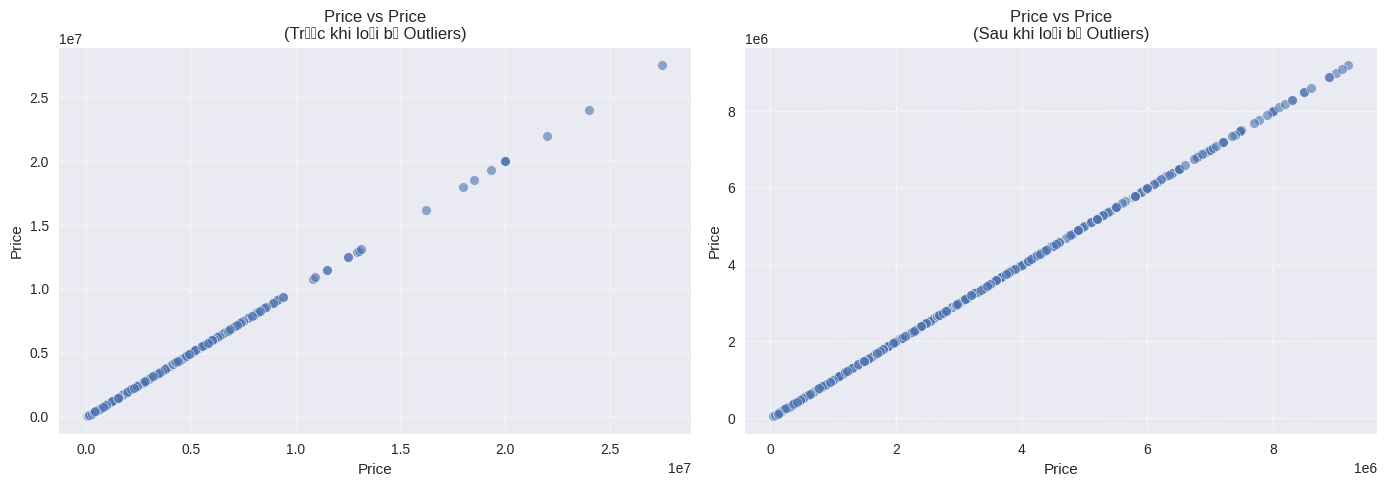

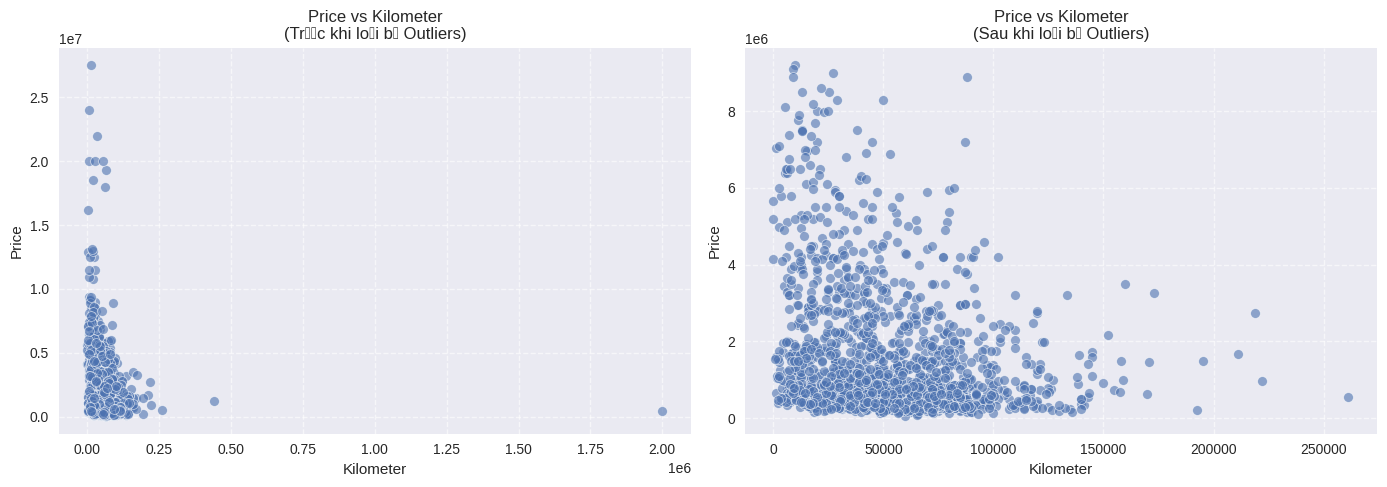

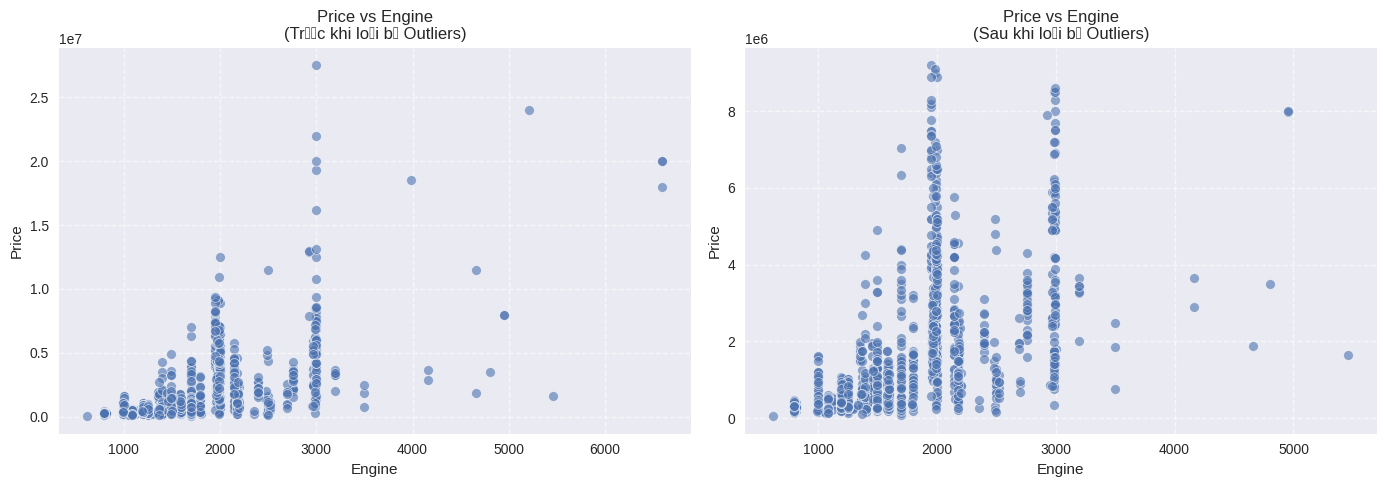

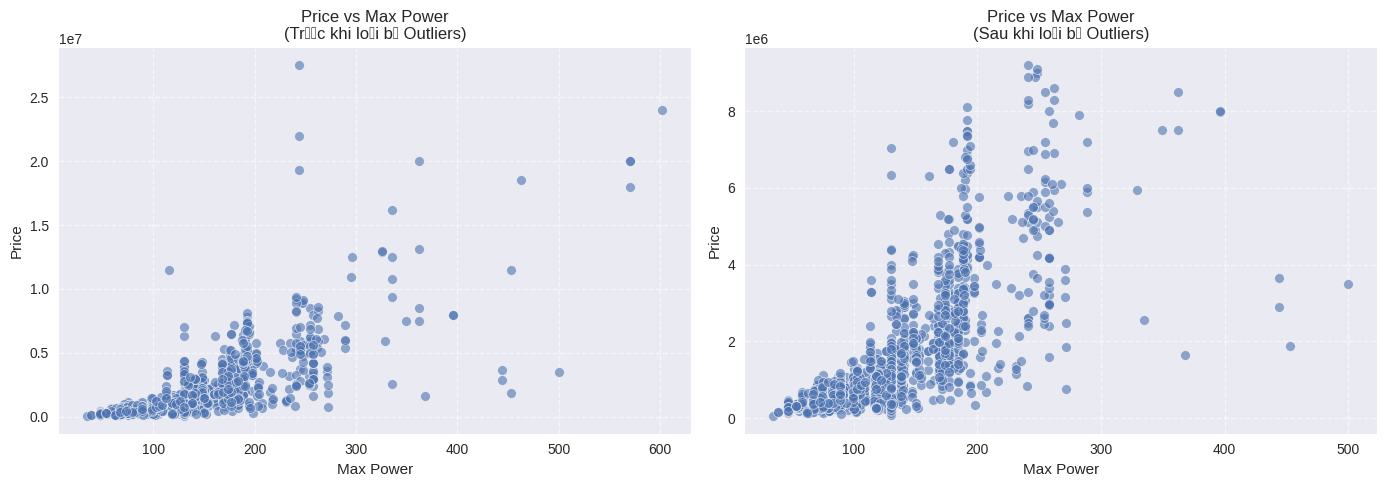

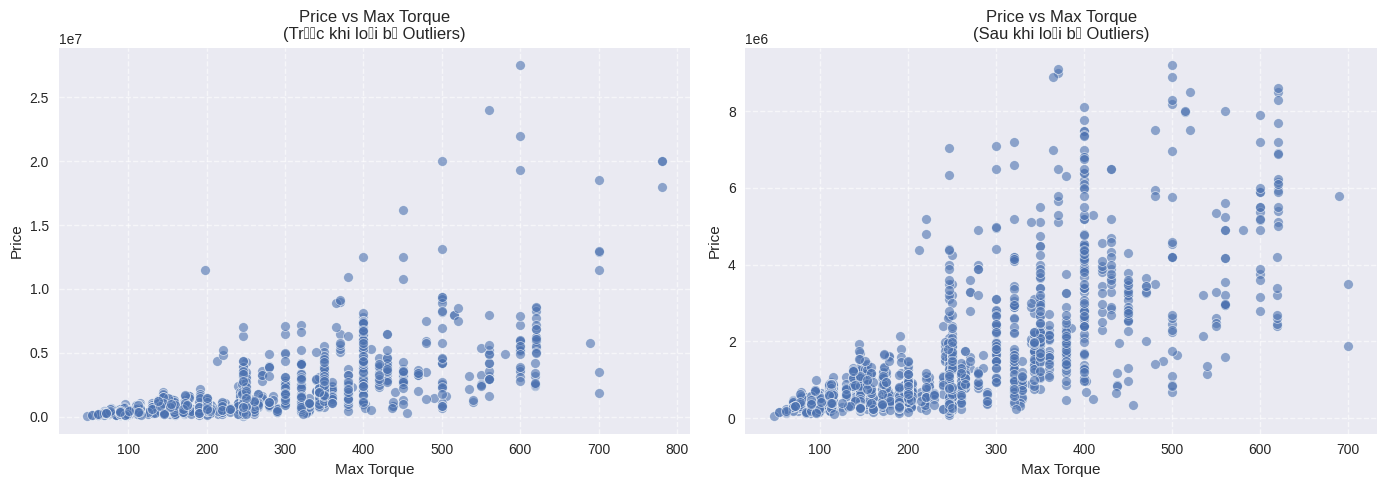

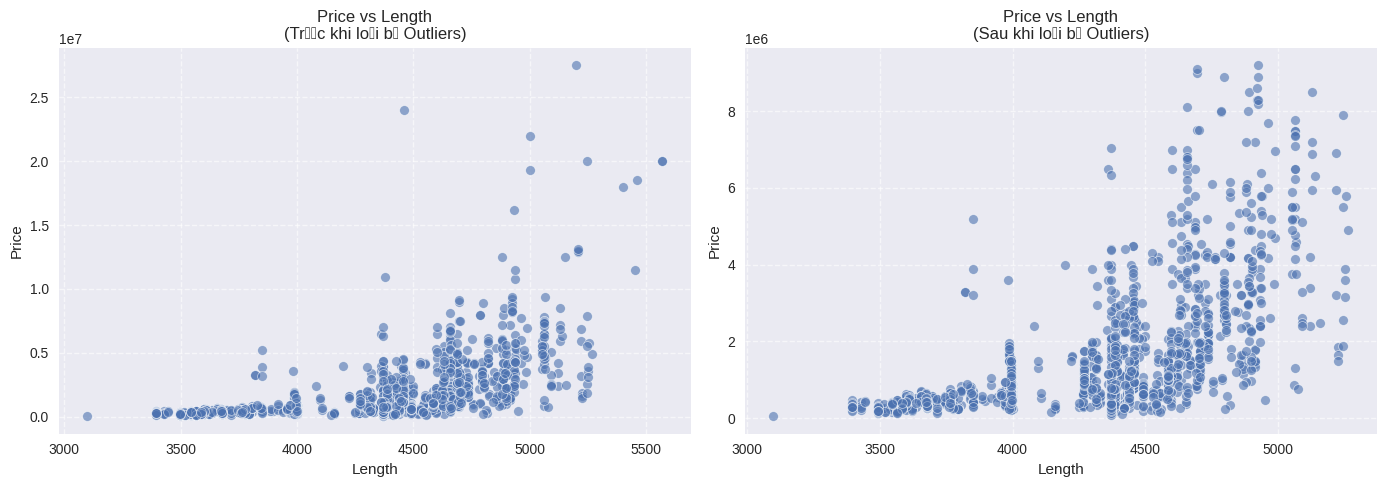

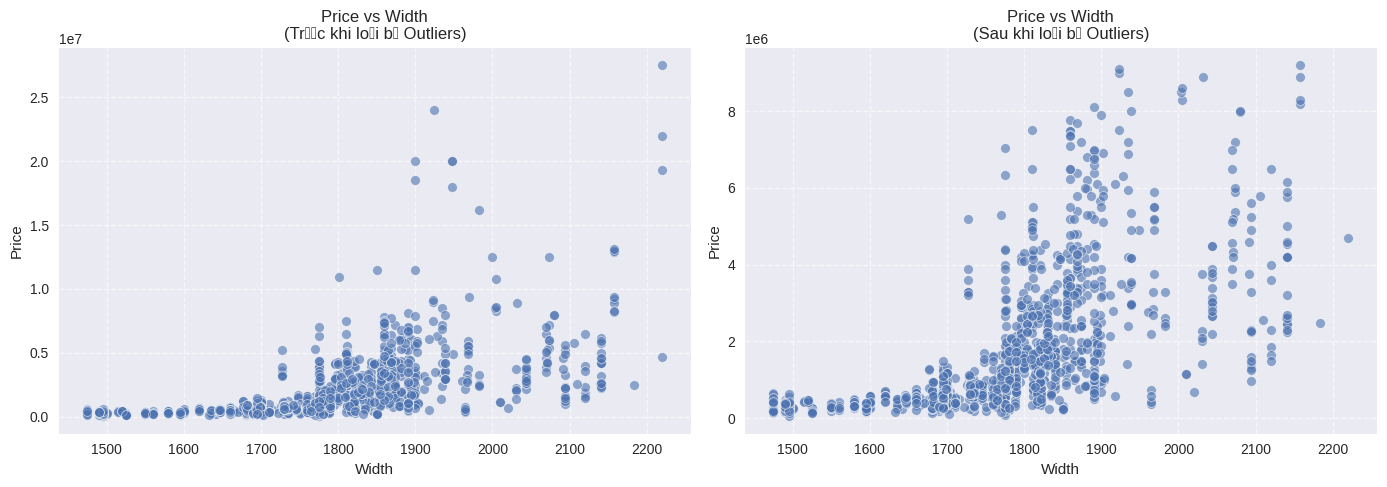

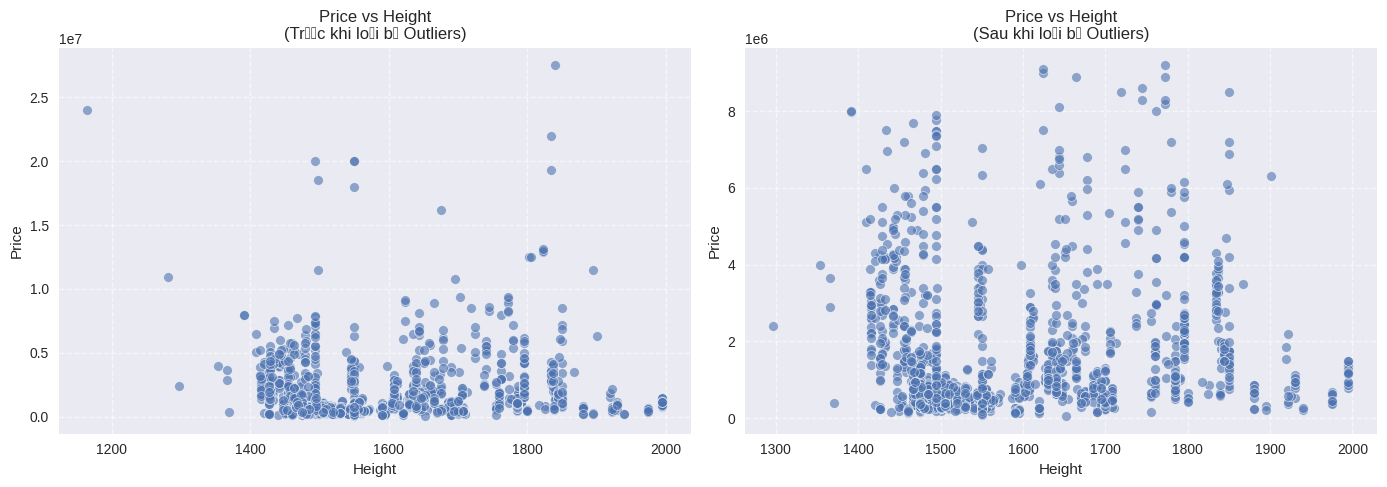

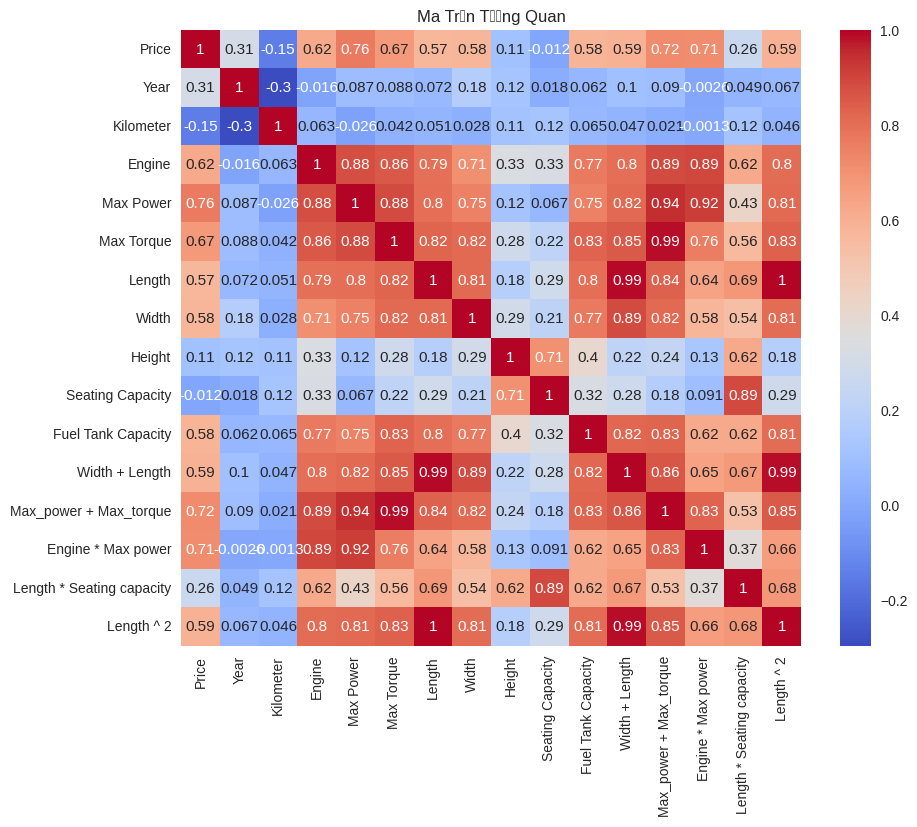

In [9]:
#View and understand the data
for col in cols_to_check_outliers:
    # Kiểm tra xem cột có tồn tại trong cả 2 DataFrame không
    if col in df.columns and col in df_filtered.columns and pd.api.types.is_numeric_dtype(df[col]):

        # Tạo figure với 2 subplot (1 hàng, 2 cột)
        fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # Tăng kích thước để dễ nhìn hơn

        # --- Biểu đồ 1: Trước khi loại bỏ outliers (df) ---
        sns.scatterplot(x=df[col], y=df['Price'], ax=axes[0], alpha=0.6, s=50) # s để chỉnh kích thước điểm
        axes[0].set_title(f'Price vs {col}\n(Trước khi loại bỏ Outliers)')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Price')
        axes[0].grid(True, linestyle='--', alpha=0.6) # Thêm lưới cho dễ nhìn

        # --- Biểu đồ 2: Sau khi loại bỏ outliers (df_filtered) ---
        sns.scatterplot(x=df_filtered[col], y=df_filtered['Price'], ax=axes[1], alpha=0.6, s=50)
        axes[1].set_title(f'Price vs {col}\n(Sau khi loại bỏ Outliers)')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Price')
        axes[1].grid(True, linestyle='--', alpha=0.6)

        # Tự động điều chỉnh khoảng cách giữa các subplot
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cột '{col}' không phải số hoặc không có trong cả hai DataFrame, bỏ qua.")
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma Trận Tương Quan')
plt.show()

# Part 3: Linear Regression Implementation - Mathematical Foundations to Code

## Professional Machine Learning Development

This section focuses on implementing a production-quality Linear Regression model from mathematical principles. You'll build each component effectivly, understanding both the theory and practical implementation details required for robust machine learning systems.

## Core Mathematical Framework

### Linear Model Representation
$$\hat{y} = \mathbf{X}\mathbf{w} = \sum_{j=0}^{n} w_j x_j$$

Where:
- $\mathbf{X} \in \mathbb{R}^{m \times n}$: Feature matrix ($m$ samples, $n$ features)
- $\mathbf{w} \in \mathbb{R}^{n}$: Weight vector (parameters to optimize)
- $\hat{y} \in \mathbb{R}^{m}$: Predicted outputs

## Implementation Steps

### 1. Forward Pass: Prediction Function

#### Mathematical Foundation:
$$\hat{\mathbf{y}} = \mathbf{X}\mathbf{w}$$

### 2. Loss Functions for Optimization

#### Mean Absolute Error (MAE)
$$\text{MAE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{m}\sum_{i=1}^{m} |y_i - \hat{y}_i|$$

##### Properties:
- **Robust to outliers**: L1 norm less sensitive to extreme values
- **Non-differentiable** at zero: Requires subgradient methods
- **Interpretable**: Same units as target variable

#### Mean Squared Error (MSE)
$$\text{MSE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{2m}\sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

##### Properties:
- **Differentiable everywhere**: Enables gradient-based optimization
- **Penalizes large errors**: Quadratic penalty encourages precise predictions
- **Statistical foundation**: Maximum likelihood estimation under Gaussian noise



## Part 4: Closed Form Solution (Normal Equation)

#### Mathematical Derivation:
For the MSE loss function, we can find the optimal weights analytically by setting the gradient to zero:

$$\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m}\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y}) = 0$$

##### Solving for optimal weights:
$$\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y}) = 0$$
$$\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}$$

##### Final Closed Form Solution:
$$\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$


#### Computational Considerations:
##### Advantages:
- **No hyperparameter tuning**: No learning rate selection needed
- **Guaranteed convergence**: Always finds the exact optimum
- **No iterations**: Single matrix computation

##### Disadvantages:
- **Matrix inversion complexity**: $O(n^3)$ computational cost
- **Memory intensive**: Requires storing $\mathbf{X}^T\mathbf{X}$ matrix
- **Numerical instability**: Issues when $\mathbf{X}^T\mathbf{X}$ is singular or near-singular
- **Scalability limitations**: Impractical for large feature dimensions ($n > 10,000$)

## Notes on Selecting Data for Closed Form Linear Regression

### Mandatory Conditions:
- Number of samples ≥ number of features (n ≥ p)
- Features are linearly independent - no feature is a linear combination of other features

### Avoid the Following Cases:
- Feature A = Feature B + Feature C
- Feature A = k × Feature B (k is a constant)
- Features with correlation = ±1.0
- Constant features (unchanging)
- Too many features compared to samples

In [10]:
# Chọn features (Có thể thay đổi để tăng độ chính xác mô hình nếu cần thiết)
numeric_cols_train = ['Engine', 'Max Torque','Length', 'Max Power', 'Fuel Tank Capacity', 'Width']
selected_columns = numeric_cols_train

# Chuẩn bị data
X_all = df_filtered[selected_columns].values.astype(float)
y_all = df_filtered['Price'].values.astype(float)

print("--- Chia Train/Test ---")
# Sử dụng train_test_split từ sklearn
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\n--- Chuẩn hóa Features ---")
# Sử dụng StandardScaler từ sklearn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Thêm cột Bias ---")
# Thêm cột bias
X_train_final = np.concatenate((X_train_scaled, np.ones((X_train_scaled.shape[0], 1))), axis=1)
X_test_final = np.concatenate((X_test_scaled, np.ones((X_test_scaled.shape[0], 1))), axis=1)
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

print("\n--- Log Transform Target ---")
# Log transform target variables
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
print(f"y_train_log shape: {y_train_log.shape}")
print(f"y_test_log shape: {y_test_log.shape}")

print("\n--- Khởi tạo Trọng số ---")
# Khởi tạo trọng số
np.random.seed(42)
w = np.random.randn(X_train_final.shape[1])
print(f"w shape: {w.shape}")

--- Chia Train/Test ---
X_train shape: (1299, 6), y_train shape: (1299,)
X_test shape: (325, 6), y_test shape: (325,)

--- Chuẩn hóa Features ---

--- Thêm cột Bias ---
X_train_final shape: (1299, 7)
X_test_final shape: (325, 7)

--- Log Transform Target ---
y_train_log shape: (1299,)
y_test_log shape: (325,)

--- Khởi tạo Trọng số ---
w shape: (7,)


In [14]:
#Closed Form Solution, student implementation
class Linear_Regression_ClosedForm:
    def __init__(self):
        self.w = None

    def predict(self, X):
        """Predict y values using X and weights w"""
        return np.dot(X, self.w)

    def compute_mae(self, y_true, y_predict):
            """Tính Mean Absolute Error"""
            n = len(y_true)
            diff = abs(y_true - y_predict)
            return np.sum(diff) / (2 * n)

    def compute_mse(self, y_true, y_predict):
        """Tính Mean Squared Error"""
        diff = (y_true - y_predict) ** 2
        sum_square = np.sum(diff)
        return sum_square / (2 * len(diff))

    def fit(self, X_train, y_train, X_test, y_test):
        # Compute optimal weights
        try:
            self.w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
        except np.linalg.LinAlgError:
            print("Matrix is not invertible")

        # Compute predictions and errors
        y_train_pred = self.predict(X_train)
        train_mse = self.compute_mse(y_train, y_train_pred)
        train_mae = self.compute_mae(y_train, y_train_pred)

        y_test_pred = self.predict(X_test)
        test_mse = self.compute_mse(y_test, y_test_pred)
        test_mae = self.compute_mae(y_test, y_test_pred)

        # Print results
        print(f"Closed-form solution completed!")
        print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
        print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

        return self.w, train_mse, test_mse, train_mae, test_mae

In [ ]:
# Đáp án
class Linear_Regression_ClosedForm:
    def __init__(self):
        self.w = None

    def predict(self, X):
        """Predict y values using X and weights w"""
        return np.dot(X, self.w)

    def compute_mae(self, y_true, y_predict):
            """Tính Mean Absolute Error"""
            n = len(y_true)
            diff = abs(y_true - y_predict)
            return np.sum(diff) / (2 * n)

    def compute_mse(self, y_true, y_predict):
        """Tính Mean Squared Error"""
        diff = (y_true - y_predict) ** 2
        sum_square = np.sum(diff)
        return sum_square / (2 * len(diff))

    def fit(self, X_train, y_train, X_test, y_test):
        """
        Train model using closed-form solution (Normal Equation)

        Parameters:
        - X_train: Training feature matrix
        - y_train: Training label vector
        - X_test: Test feature matrix
        - y_test: Test label vector
        - regularization: Type of regularization ('l2' or None)
        - lambda_reg: Regularization coefficient

        Returns:
        - w: Optimal weights
        - train_mse: MSE on training set
        - test_mse: MSE on test set
        - train_mae: MAE on training set
        - test_mae: MAE on test set
        """
        # Compute optimal weights step-by-step
        try:
               # Step 1: Compute X^T X
                XtX = X_train.T @ X_train
                # Step 2: Compute (X^T X)^(-1)
                XtX_inv = np.linalg.inv(XtX)
                # Step 3: Compute X^T y
                Xty = X_train.T @ y_train
                # Step 4: Compute w = (X^T X)^(-1) X^T y
                self.w = XtX_inv @ Xty
        except np.linalg.LinAlgError:
            print("Matrix is not invertible")

        # Compute predictions and errors
        y_train_pred = self.predict(X_train)
        train_mse = self.compute_mse(y_train, y_train_pred)
        train_mae = self.compute_mae(y_train, y_train_pred)

        y_test_pred = self.predict(X_test)
        test_mse = self.compute_mse(y_test, y_test_pred)
        test_mae = self.compute_mae(y_test, y_test_pred)

        # Print results
        print(f"Closed-form solution completed!")
        print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
        print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

        return self.w, train_mse, test_mse, train_mae, test_mae

In [16]:
model = Linear_Regression_ClosedForm()
w_optimal, history_train_MSE, history_test_MSE, history_train_MAE, history_test_MAE = model.fit(
    X_train_final, y_train_log, X_test_final, y_test_log
)

Closed-form solution completed!
Train MSE: 0.1286, Test MSE: 0.1540
Train MAE: 0.1914, Test MAE: 0.2024


# Part 5: Gradient Descent
## 1. Gradient Descent: A Scalable Alternative
To address the limitations of the closed-form solution, **Gradient Descent** emerges as a powerful optimization technique capable of handling tasks that the closed-form approach cannot efficiently manage, such as:
- **Large-scale datasets**: Efficiently processes high-dimensional data with linear time complexity $O(n)$ per iteration
- **Memory efficiency**: Avoids storing large matrices like $\mathbf{X}^T\mathbf{X}$
- **Online learning**: Adapts to streaming data for real-time updates
- **Regularization**: Easily incorporates L1/L2 regularization for improved generalization
- **Non-linear extensions**: Serves as the foundation for optimizing complex models like neural networks

#### When to Use Each Method:

| Method | Best for | Limitations |
|--------|----------|-------------|
| **Closed Form** | Small datasets ($n < 10,000$) | High memory usage, $O(n^3)$ complexity |
| **Gradient Descent** | Large datasets, high dimensions | Requires hyperparameter tuning |

## 2. Gradient Computation - The Heart of Optimization

#### Analytical Gradient Derivation:
Starting from MSE loss function:
$$J(\mathbf{w}) = \frac{1}{2m}\|\mathbf{X}\mathbf{w} - \mathbf{y}\|^2$$

##### Step-by-step derivation:
$$\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m}\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y})$$

## 3. Gradient Descent Algorithm

#### Parameter Update Rule:
$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla J(\mathbf{w}^{(t)})$$

Where:
- $\alpha$: Learning rate (step size)
- $\nabla J(\mathbf{w}^{(t)})$: Gradient at iteration $t$

In [ ]:
# Chọn features (Có thể thay đổi để tăng độ chính xác mô hình nếu cần thiết)
numeric_cols_train = ['Engine * Max power', 'Max_power + Max_torque','Length', 'Length ^ 2', 'Fuel Tank Capacity', 'Width']
make_columns_train = [col for col in df_filtered.columns if col.startswith('Make_')] #Có thể sử dụng thêm One hot encoding data
owner_columns_train = [col for col in df_filtered.columns if col.startswith('Owner_')]
selected_columns = numeric_cols_train + make_columns_train + owner_columns_train

# Chuẩn bị data
X_all = df_filtered[selected_columns].values.astype(float)
y_all = df_filtered['Price'].values.astype(float)

print("--- Chia Train/Test ---")
# Sử dụng train_test_split từ sklearn
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\n--- Chuẩn hóa Features ---")
# Sử dụng StandardScaler từ sklearn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Thêm cột Bias ---")
# Thêm cột bias
X_train_final = np.concatenate((X_train_scaled, np.ones((X_train_scaled.shape[0], 1))), axis=1)
X_test_final = np.concatenate((X_test_scaled, np.ones((X_test_scaled.shape[0], 1))), axis=1)
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

print("\n--- Log Transform Target ---")
# Log transform target variables
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
print(f"y_train_log shape: {y_train_log.shape}")
print(f"y_test_log shape: {y_test_log.shape}")

print("\n--- Khởi tạo Trọng số ---")
# Khởi tạo trọng số
np.random.seed(42)
w = np.random.randn(X_train_final.shape[1])
print(f"w shape: {w.shape}")

--- Chia Train/Test ---
X_train shape: (1299, 43), y_train shape: (1299,)
X_test shape: (325, 43), y_test shape: (325,)

--- Chuẩn hóa Features ---

--- Thêm cột Bias ---
X_train_final shape: (1299, 44)
X_test_final shape: (325, 44)

--- Log Transform Target ---
y_train_log shape: (1299,)
y_test_log shape: (325,)

--- Khởi tạo Trọng số ---
w shape: (44,)


In [63]:
#Linear Regression, student implementation
class Linear_Regression:
    def predict(self, X, w):
        """
        Dự đoán giá trị y dựa trên X và trọng số w

        Args:
            X: Ma trận đặc trưng (n_samples, n_features)
            w: Vector trọng số (n_features,)

        Returns:
            y_pred: Vector dự đoán (n_samples,)

        TODO: Hoàn thành công thức dự đoán y = X * w
        """
        # Gợi ý: Sử dụng np.dot() để nhân ma trận
        return np.dot(X, w)

    def compute_MAE(self, y_true, y_predict):
        """
        Tính Mean Absolute Error (MAE)

        Args:
            y_true: Giá trị thực
            y_predict: Giá trị dự đoán

        Returns:
            mae: Mean Absolute Error

        TODO: Hoàn thành công thức MAE = (1/n) * Σ|y_true - y_predict|
        """
        n = len(y_true)
        # Gợi ý: Tính giá trị tuyệt đối của sai số
        diff = y_true - y_predict
        # Gợi ý: Tính trung bình của sai số tuyệt đối
        return np.average(np.abs(diff))

    def compute_MSE(self, y_true, y_predict):
        """
        Tính Mean Squared Error (MSE)

        Args:
            y_true: Giá trị thực
            y_predict: Giá trị dự đoán

        Returns:
            mse: Mean Squared Error

        TODO: Hoàn thành công thức MSE = (1/2n) * Σ(y_true - y_predict)²
        """
        # Gợi ý: Tính bình phương của sai số
        diff = (y_true - y_predict)**2
        sum_square = np.sum(diff)
        # Gợi ý: Chia cho (2 * số lượng mẫu)
        return sum_square/(2*len(diff))

    def compute_gradient(self, X, y, w):
        """
        Tính gradient của hàm loss theo trọng số w

        Args:
            X: Ma trận đặc trưng
            y: Vector giá trị thực
            w: Vector trọng số

        Returns:
            gradient: Vector gradient

        TODO: Hoàn thành công thức gradient = (1/n) * X.T * (y_predict - y)
        """
        # Bước 1: Tính dự đoán
        y_predict = self.predict(X, w)

        n = len(y)
        # Bước 2: Tính sai số
        error = y_predict - y

        # Bước 3: Tính gradient
        # Gợi ý: gradient = (1/n) * X.T * error
        gradient = (1/n) * np.dot(X.T, error)

        return gradient

    def calculate_r2(self, y_true, y_pred):
        """
        Tính hệ số R² (coefficient of determination)

        Args:
            y_true: Giá trị thực
            y_pred: Giá trị dự đoán

        Returns:
            r2: Hệ số R²

        TODO: Hoàn thành công thức R² = 1 - (SS_res / SS_tot)
        """
        # Bước 1: Tính giá trị trung bình của y_true
        y_mean = np.mean(y_true)

        # Bước 2: Tính tổng bình phương toàn phần (SS_tot)
        # SS_tot = Σ(y_true - y_mean)²
        ss_tot = np.sum((y_true - y_mean)**2)

        # Bước 3: Tính tổng bình phương sai số (SS_res)
        # SS_res = Σ(y_true - y_pred)²
        ss_res = np.sum((y_true - y_pred)**2)

        # Bước 4: Tính R²
        r2 = 1 - (ss_res / ss_tot)

        return r2

    def gradient_descent(self, X_train, y_train, X_test, y_test, w,
                        learning_rate=0.001, iterations=1000):
        """
        Thuật toán Gradient Descent để tối ưu trọng số

        Args:
            X_train, y_train: Dữ liệu huấn luyện
            X_test, y_test: Dữ liệu kiểm tra
            w: Trọng số ban đầu
            learning_rate: Tốc độ học
            iterations: Số vòng lặp
            save_weights_path: Đường dẫn lưu trọng số
            save_std_mean: Đường dẫn lưu mean/std

        Returns:
            w: Trọng số cuối cùng
            train_MSE_history: Lịch sử MSE trên tập train
            val_MSE_history: Lịch sử MSE trên tập validation
            train_MAE_history: Lịch sử MAE trên tập train
            val_MAE_history: Lịch sử MAE trên tập validation
        """
        train_MSE_history = []
        val_MSE_history = []
        train_MAE_history = []
        val_MAE_history = []

        for i in range(iterations):
            # TODO: Tính dự đoán trên tập train
            y_train_pred = self.predict(X_train, w)

            # TODO: Tính lỗi MSE và MAE trên tập train
            train_error_MSE = self.compute_MSE(y_train, y_train_pred)
            train_error_MAE = self.compute_MAE(y_train, y_train_pred)

            train_MSE_history.append(train_error_MSE)
            train_MAE_history.append(train_error_MAE)

            # TODO: Tính dự đoán trên tập test
            y_test_pred = self.predict(X_test, w)

            # TODO: Tính lỗi MSE và MAE trên tập test
            val_error_MSE = self.compute_MSE(y_test, y_test_pred)
            val_error_MAE = self.compute_MAE(y_test, y_test_pred)

            val_MSE_history.append(val_error_MSE)
            val_MAE_history.append(val_error_MAE)

            if (i+1) % 50 == 0:  # In lỗi sau mỗi 50 vòng lặp
                print(f"Iter: {i+1}, Train MSE: {train_error_MSE:.4f}, Val MSE: {val_error_MSE:.4f}, Train MAE: {train_error_MAE:.4f}, Val MAE: {val_error_MAE:.4f}")

            # TODO: Cập nhật trọng số theo công thức gradient descent
            # w = w - learning_rate * gradient
            gradient = self.compute_gradient(X_train, y_train, w)
            w = w - (learning_rate * gradient)

        return w, train_MSE_history, val_MSE_history, train_MAE_history, val_MAE_history


In [34]:
#Linear Regression (Đáp án)
class Linear_Regression:
    def predict(self, X, w):
        return np.dot(X, w)
    def compute_MAE(self,y_true, y_predict):
        n = len(y_true)
        diff = abs(y_true - y_predict)
        return np.sum(diff) / (2 * n)
    def compute_MSE(self,y_true,y_predict):
        diff = (y_true - y_predict) ** 2
        sum_square = np.sum(diff)
        return sum_square / (2 * len(diff))
    def compute_gradient(self,X, y, w):
        y_predict = self.predict(X, w)
        n = len(y)
        error = y_predict - y
        gradient = (1/n) * np.dot(X.T, error)
        return gradient
    def calculate_r2(self, y_true, y_pred):
        y_mean = sum(y_true) / len(y_true)
        ss_tot = sum((y - y_mean) ** 2 for y in y_true)
        ss_res = sum((y_t - y_p) ** 2 for y_t, y_p in zip(y_true, y_pred))
        r2 = 1 - (ss_res / ss_tot)
        return r2
    def gradient_descent(self, X_train, y_train, X_test, y_test, w, learning_rate = 0.001, iterations = 1000):
        train_MSE_history = []
        val_MSE_history = []
        train_MAE_history = []
        val_MAE_history = []
        for i in range(iterations):
            # Tính lỗi trên tập train
            y_train_pred = self.predict(X_train, w)
            train_error_MSE = self.compute_MSE(y_train, y_train_pred)
            train_error_MAE = self.compute_MAE(y_train, y_train_pred)
            train_MSE_history.append(train_error_MSE)
            train_MAE_history.append(train_error_MAE)

            # Tính lỗi trên tập test
            y_test_pred = self.predict(X_test, w)
            val_error_MSE = self.compute_MSE(y_test, y_test_pred)
            val_error_MAE = self.compute_MAE(y_test, y_test_pred)
            val_MSE_history.append(val_error_MSE)
            val_MAE_history.append(val_error_MAE)

            if (i+1) % 50 == 0: # In lỗi sau mỗi 50 vòng lặp
                 print(f"Iter: {i+1}, Train MSE: {train_error_MSE:.4f}, Val MSE: {val_error_MSE:.4f}, Train MAE: {train_error_MAE:.4f}, Val MAE: {val_error_MAE:.4f}")

            # Cập nhật trọng số
            w = w - learning_rate * self.compute_gradient(X_train, y_train, w)
        return w, train_MSE_history, val_MSE_history, train_MAE_history, val_MAE_history

In [64]:
model = Linear_Regression()
iterations = 1000
alpha = 0.01
w_optimal, history_train_MSE, history_test_MSE, history_train_MAE, history_test_MAE = model.gradient_descent(
    X_train_final, y_train_log, X_test_final, y_test_log, w, alpha, iterations
)

Iter: 50, Train MSE: 28.0380, Val MSE: 28.0594, Train MAE: 7.4478, Val MAE: 7.4378
Iter: 100, Train MSE: 10.4166, Val MSE: 10.4732, Train MAE: 4.5091, Val MAE: 4.5113
Iter: 150, Train MSE: 3.9538, Val MSE: 4.0085, Train MAE: 2.7359, Val MAE: 2.7468
Iter: 200, Train MSE: 1.5769, Val MSE: 1.6293, Train MAE: 1.6718, Val MAE: 1.6919
Iter: 250, Train MSE: 0.6979, Val MSE: 0.7482, Train MAE: 1.0623, Val MAE: 1.0866
Iter: 300, Train MSE: 0.3690, Val MSE: 0.4174, Train MAE: 0.7357, Val MAE: 0.7642
Iter: 350, Train MSE: 0.2430, Val MSE: 0.2893, Train MAE: 0.5704, Val MAE: 0.5974
Iter: 400, Train MSE: 0.1923, Val MSE: 0.2367, Train MAE: 0.4918, Val MAE: 0.5133
Iter: 450, Train MSE: 0.1701, Val MSE: 0.2125, Train MAE: 0.4521, Val MAE: 0.4713
Iter: 500, Train MSE: 0.1590, Val MSE: 0.1997, Train MAE: 0.4306, Val MAE: 0.4494
Iter: 550, Train MSE: 0.1525, Val MSE: 0.1916, Train MAE: 0.4180, Val MAE: 0.4371
Iter: 600, Train MSE: 0.1482, Val MSE: 0.1859, Train MAE: 0.4098, Val MAE: 0.4299
Iter: 650, Tr

## Part 6: Model Evaluation and Analysis

### Evaluation Metrics

After training your model, you need to evaluate its performance using various metrics:

**Mean Squared Error (MSE):**  
$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE):**  
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**R-squared (Coefficient of Determination):**  
$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

Where:  
- $SS_{\text{res}}$ = Sum of squares of residuals  
- $SS_{\text{tot}}$ = Total sum of squares  
- $\bar{y}$ = Mean of actual values

**Interpretation:**  
- **MSE/RMSE**: Lower values indicate better fit (0 = perfect fit)  
- **R²**: Higher values indicate better fit (1 = perfect fit, 0 = no predictive power)


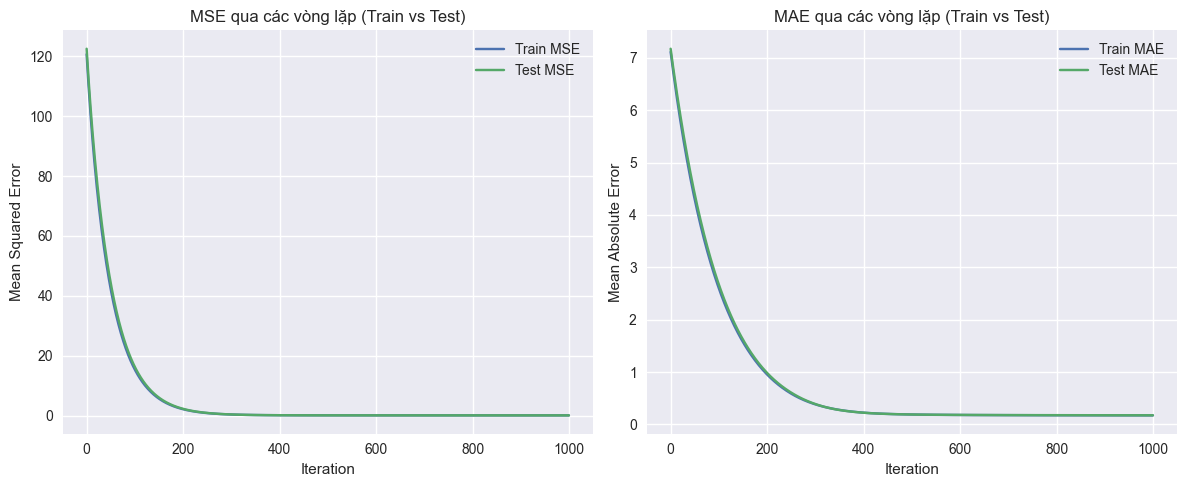

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(iterations), history_train_MSE, label='Train MSE')
plt.plot(range(iterations), history_test_MSE, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE qua các vòng lặp (Train vs Test)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(iterations), history_train_MAE, label='Train MAE')
plt.plot(range(iterations), history_test_MAE, label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error')
plt.title('MAE qua các vòng lặp (Train vs Test)')
plt.legend()

plt.tight_layout()
plt.show()



Đánh giá trên tập test (giá trị gốc):
RMSE: 626575.63
MAE: 257063.15
R^2: 0.65


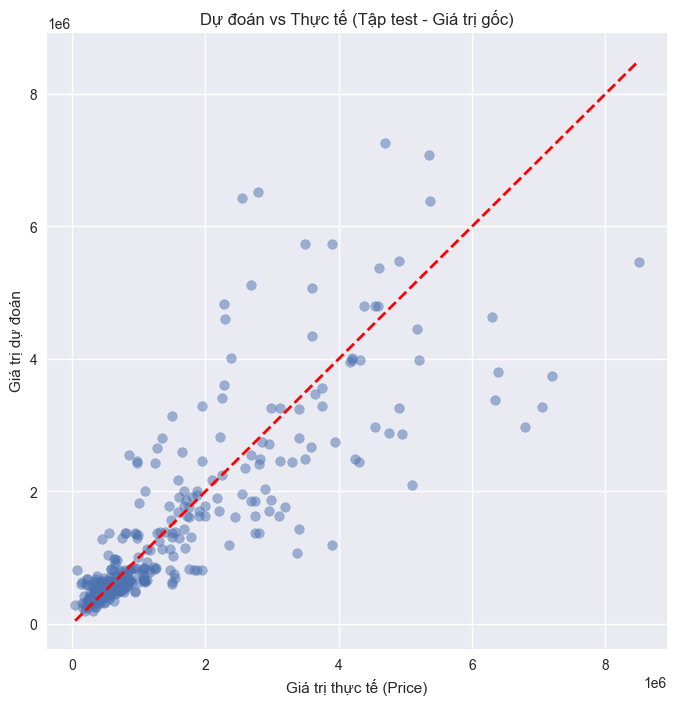

In [ ]:
#Đánh giá trên tập test
y_test_pred_log = model.predict(X_test_final, w_optimal)
y_test_actual_orig = np.expm1(y_test_log)
y_test_pred_orig = np.expm1(y_test_pred_log)
rmse_test = np.sqrt(model.compute_MSE(y_test_actual_orig, y_test_pred_orig))
mae_test = model.compute_MAE(y_test_actual_orig, y_test_pred_orig)
R_squared = model.calculate_r2(y_test_actual_orig, y_test_pred_orig)
print(f"\nĐánh giá trên tập test (giá trị gốc):")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R^2: {R_squared:.2f}")
# Trực quan hóa dự đoán vs thực tế trên tập test (giá trị gốc)
plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual_orig, y_test_pred_orig, alpha=0.5)
plt.plot([y_test_actual_orig.min(), y_test_actual_orig.max()], [y_test_actual_orig.min(), y_test_actual_orig.max()], 'r--', lw=2)
plt.xlabel('Giá trị thực tế (Price)')
plt.ylabel('Giá trị dự đoán')
plt.title('Dự đoán vs Thực tế (Tập test - Giá trị gốc)')
plt.show()